In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
import nltk
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [57]:
df=pd.read_csv('dicedata.csv')


In [58]:
df['Searched Title']=df['Searched Title'].str.strip()
df['Company']=df['Company'].str.strip(',')
df['City'], df['State'] = df['Location'].str.split(',', 1).str
print(df.head(2))

   Unnamed: 0 Searched Title                      Company         Position  \
0           0   Data Analyst  SPIN Analytics and Strategy  Sr Data Analyst   
1           1   Data Analyst                Source Coders     Data Analyst   

            Location                                             Skills  \
0      San Mateo, CA  Statistics, SQL/R, Python, Hadoop, Tableau, Sp...   
1  San Francisco, CA     Data, Data Analyst, SQL, Python, mobile gaming   

            City State  
0      San Mateo    CA  
1  San Francisco    CA  


In [59]:
del df['Unnamed: 0']
print(df)

    Searched Title                                  Company  \
0     Data Analyst              SPIN Analytics and Strategy   
1     Data Analyst                            Source Coders   
2     Data Analyst                   Robert Half Technology   
3     Data Analyst                              CyberCoders   
4     Data Analyst                                Genesis10   
5     Data Analyst                              CyberCoders   
6     Data Analyst                              CyberCoders   
7     Data Analyst                    Signature Consultants   
8     Data Analyst                        Mainz Brady Group   
9     Data Analyst                       Eaton & Associates   
10    Data Analyst                                  Mastech   
11    Data Analyst                   JCG-DBA BI Group, Inc.   
12    Data Analyst                             Estuate Inc.   
13    Data Analyst                             Estuate Inc.   
14    Data Analyst                 Ascentiant Internati

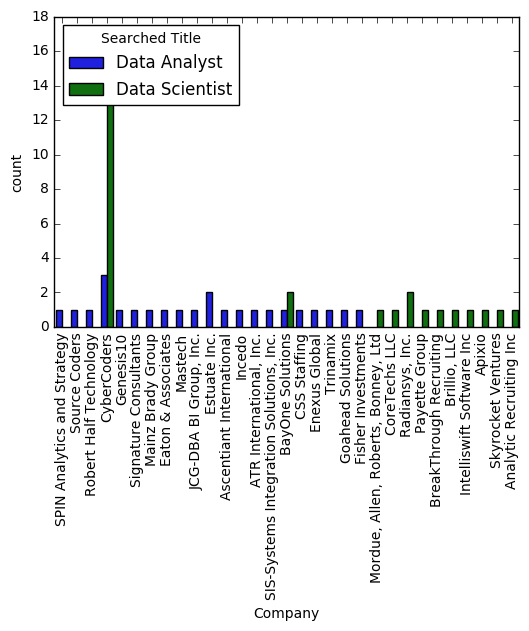

In [60]:
sns.countplot(x='Company',hue='Searched Title',data=df)
plt.xticks(rotation='vertical')
plt.show()

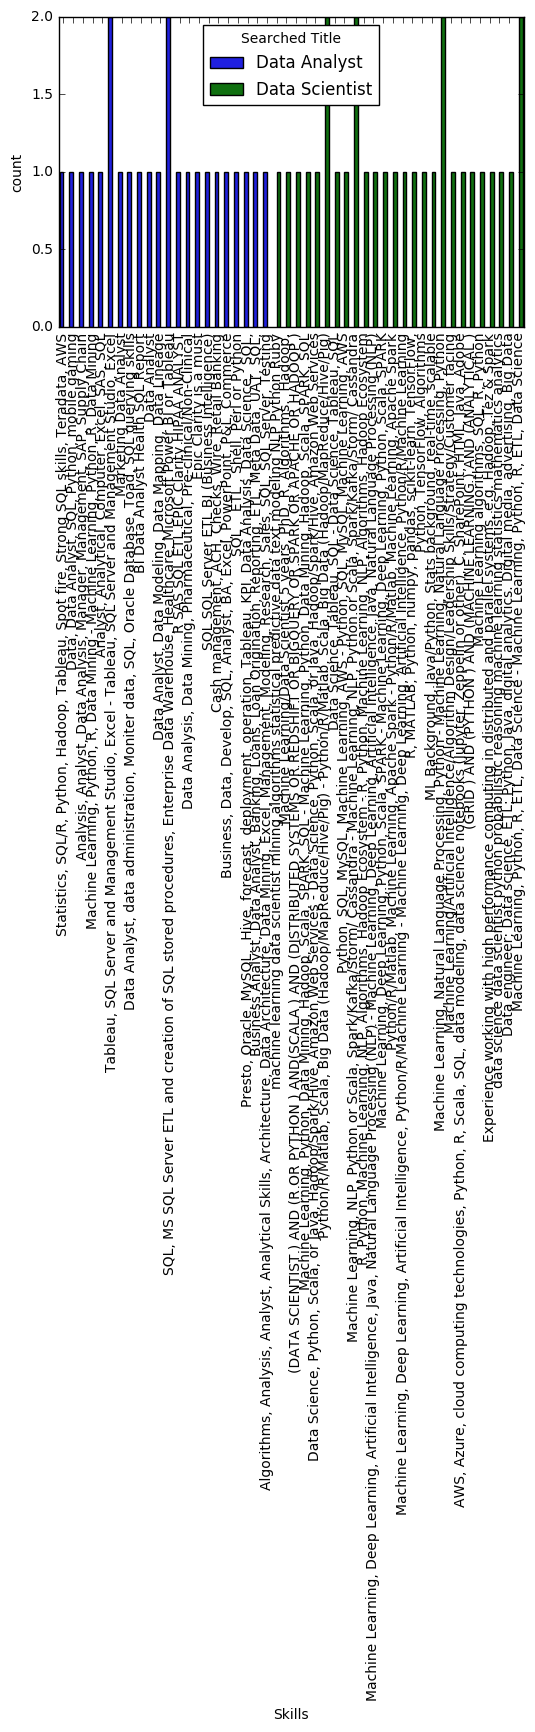

In [61]:
sns.countplot(x='Skills',hue='Searched Title',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
skillset=df['Skills']

#tokenizer = RegexpTokenizer('\w+')
#tokens = tokenizer.tokenize(skillset)
#print(tokens)
processed=skillset.str.lower()
processed = processed.str.replace('\s+', '')
processed = processed.str.replace(r'[^\w\d\s]', ' ')
processed = processed.str.replace(r'\s+', ' ')
processed = processed.str.replace(r'^\s+|\s+?$', '')
print(processed)

0     statistics sql r python hadoop tableau spotfir...
1              data dataanalyst sql python mobilegaming
2     analysis analyst dataanalysis manager manageme...
3     machinelearning python r datamining machinelea...
4             analyst analytical computer excel sas sql
5     tableau sqlserverandmanagementstudio excel tab...
6     tableau sqlserverandmanagementstudio excel tab...
7                                  marketingdataanalyst
8     dataanalyst dataadministration moniterdata sql...
9                          bidataanalysthealthsqlreport
10                                          dataanalyst
11     dataanalyst datamodeling datamapping datalineage
12    sql mssqlserveretlandcreationofsqlstoredproced...
13    sql mssqlserveretlandcreationofsqlstoredproced...
14                    rsassqletlepicclarityhipaaanalyst
15    dataanalysis datamining pharmaceutical pre cli...
16                                   epicclarityisamust
17               sqlsqlserveretlbi businessintel

In [63]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

In [64]:
train_data_features = vectorizer.fit_transform(processed)
train_data_features = train_data_features.toarray()

In [65]:
vocab = vectorizer.get_feature_names()
print (vocab)

[u'ach', u'adobe', u'advertising', u'algorithmdesign', u'algorithms', u'amazonwebservices', u'analysis', u'analyst', u'analytical', u'analyticalskills', u'and', u'apachespark', u'architecture', u'artificialintelligence', u'aws', u'azure', u'ba', u'banking', u'bidataanalysthealthsqlreport', u'bigdata', u'business', u'businessanalyst', u'businessintelligence', u'cashmanagement', u'cassandra', u'checks', u'clinical', u'cloudcomputingtechnologies', u'commerce', u'computer', u'customerfacing', u'data', u'dataadministration', u'dataanalysis', u'dataanalyst', u'dataarchitecture', u'dataengineer', u'datalineage', u'datamapping', u'datamining', u'datamodeling', u'datascience', u'datasciencedatascientistpythonprobabilisticreasoningmachinelearningstatisticsmathematicsanalytics', u'datasciencenotebooks', u'datascientist', u'datascientist5years', u'deeplearning', u'deployment', u'develop', u'digitalanalytics', u'digitalmedia', u'distributedsystemsorredshiftorbigqueryorsparkorapacheorhadoop', u'ente

In [66]:
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print count, tag

1 ach
1 adobe
1 advertising
1 algorithmdesign
5 algorithms
2 amazonwebservices
2 analysis
4 analyst
2 analytical
1 analyticalskills
6 and
2 apachespark
1 architecture
5 artificialintelligence
4 aws
1 azure
1 ba
1 banking
1 bidataanalysthealthsqlreport
5 bigdata
1 business
1 businessanalyst
1 businessintelligence
1 cashmanagement
4 cassandra
1 checks
2 clinical
1 cloudcomputingtechnologies
1 commerce
1 computer
1 customerfacing
2 data
1 dataadministration
3 dataanalysis
5 dataanalyst
1 dataarchitecture
1 dataengineer
1 datalineage
1 datamapping
6 datamining
2 datamodeling
10 datascience
1 datasciencedatascientistpythonprobabilisticreasoningmachinelearningstatisticsmathematicsanalytics
1 datasciencenotebooks
1 datascientist
1 datascientist5years
6 deeplearning
1 deployment
1 develop
1 digitalanalytics
1 digitalmedia
1 distributedsystemsorredshiftorbigqueryorsparkorapacheorhadoop
2 enterprisedatawarehouse
1 epicclarityisamust
7 etl
7 excel
1 experienceworkingwithhighperformancecomputingin

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data_features, df['Searched Title'], random_state=0)

In [68]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, Y_train )

In [69]:
Y_pred = forest.predict(X_test)

In [70]:
print(Y_pred)
print(Y_test)

['Data Scientist' 'Data Scientist' 'Data Analyst' 'Data Analyst'
 'Data Analyst' 'Data Analyst' 'Data Scientist' 'Data Scientist'
 'Data Scientist' 'Data Scientist' 'Data Analyst' 'Data Analyst'
 'Data Scientist' 'Data Analyst']
53    Data Scientist
33    Data Scientist
48    Data Scientist
26    Data Scientist
11      Data Analyst
2       Data Analyst
32    Data Scientist
42    Data Scientist
45    Data Scientist
30    Data Scientist
4       Data Analyst
10      Data Analyst
28    Data Scientist
22      Data Analyst
Name: Searched Title, dtype: object


In [71]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.857142857143


In [72]:
pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred),
    index=[['actual', 'actual'], ['Data Scientist', 'Data Analyst']],
    columns=[['predicted', 'predicted'], ['Data Scientist', 'Data Analyst']]
)

predicted             
                      Data Scientist Data Analyst
actual Data Scientist              5            0
       Data Analyst                2            7